## Case Study - Visualizing Seattle Bicycle Counts
   
   - Time series data,  bicycle counts on Seattle's Fremont Bridge
   - http://www.openstreetmap.org/#map=17/47.64813/-122.34965
   - This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge.

In [1]:
import pandas as pd
import numpy as np

import calendar

import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (18,6)

import seaborn as sns; sns.set()

pd.options.display.max_rows = 12

https://data.seattle.gov/Transportation/Fremont-Bridge-Hourly-Bicycle-Counts-by-Month-Octo/65db-xm6k

In [2]:
data = pd.read_csv('http://people.bu.edu/kalathur/datasets/Fremont_Bridge_Hourly_Bicycle_Counts.csv',
                   index_col='Date', parse_dates=True)

In [3]:
data.shape

(62040, 2)

In [4]:
data

,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,
2019-01-01 00:00:00,0.0,9.0
2019-01-01 01:00:00,2.0,22.0
2019-01-01 02:00:00,1.0,11.0
2019-01-01 03:00:00,1.0,2.0
2019-01-01 04:00:00,2.0,1.0
...,...,...
2016-02-29 00:00:00,2.0,2.0
2013-09-13 03:00:00,1.0,1.0
2016-12-07 00:00:00,3.0,3.0


In [5]:
data.columns

Index(['Fremont Bridge East Sidewalk', 'Fremont Bridge West Sidewalk'], dtype='object')

In [6]:
data.columns = ['East', 'West']

data['Total'] = data.eval('East + West')

In [7]:
data

,East,West,Total
Date,,,
2019-01-01 00:00:00,0.0,9.0,9.0
2019-01-01 01:00:00,2.0,22.0,24.0
2019-01-01 02:00:00,1.0,11.0,12.0
2019-01-01 03:00:00,1.0,2.0,3.0
2019-01-01 04:00:00,2.0,1.0,3.0
...,...,...,...
2016-02-29 00:00:00,2.0,2.0,4.0
2013-09-13 03:00:00,1.0,1.0,2.0
2016-12-07 00:00:00,3.0,3.0,6.0


In [8]:
data.isnull().any()

East     True
West     True
Total    True
dtype: bool

In [9]:
len(data)

62040

In [10]:
data.dropna(inplace=True)
len(data)

62031

In [11]:
data.describe()

,East,West,Total
count,62031.000000,62031.000000,62031.000000
mean,52.858603,61.794280,114.652883
std,67.738822,90.417195,145.685842
min,0.000000,0.000000,0.000000
25%,7.000000,7.000000,15.000000
50%,29.000000,30.000000,62.000000
75%,71.000000,74.000000,150.000000
max,698.000000,850.000000,1097.000000


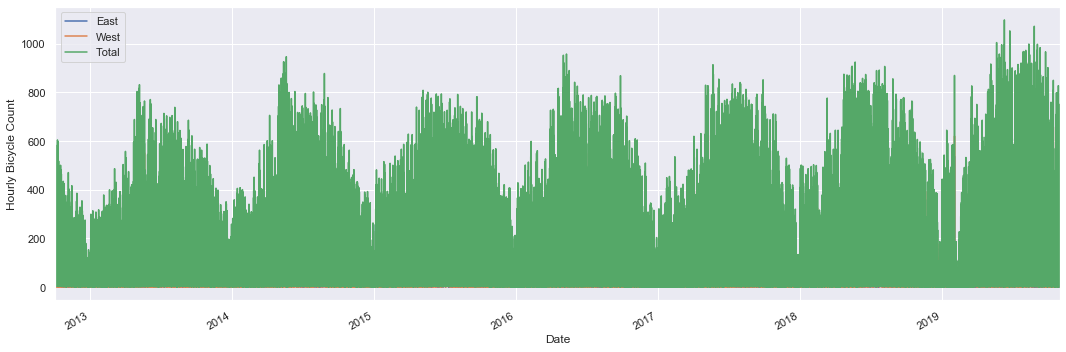

In [12]:
fig, ax = plt.subplots(figsize=(18,6))

data.plot(ax=ax)

plt.ylabel('Hourly Bicycle Count');

In [13]:
weekly = data.resample('W').sum()
weekly

,East,West,Total
Date,,,
2012-10-07,7297.0,6995.0,14292.0
2012-10-14,8679.0,8116.0,16795.0
2012-10-21,7946.0,7563.0,15509.0
2012-10-28,6901.0,6536.0,13437.0
2012-11-04,6408.0,5786.0,12194.0
...,...,...,...
2019-10-06,9785.0,17485.0,27270.0
2019-10-13,8543.0,14952.0,23495.0
2019-10-20,6835.0,12497.0,19332.0


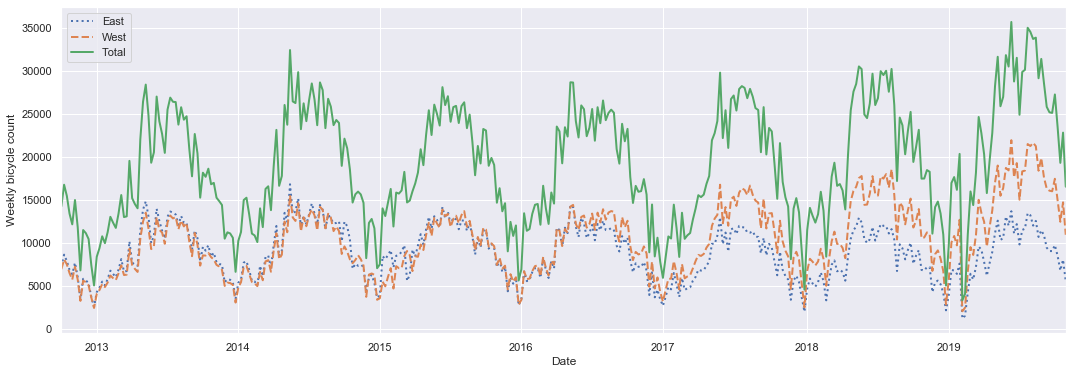

In [14]:
fig, ax = plt.subplots(figsize=(18,6))

weekly.plot(style=[':', '--', '-'], ax=ax, lw=2)

plt.ylabel('Weekly bicycle count');

In [15]:
daily = data.resample('D').sum()
daily

,East,West,Total
Date,,,
2012-10-03,1760.0,1761.0,3521.0
2012-10-04,1708.0,1767.0,3475.0
2012-10-05,1558.0,1590.0,3148.0
2012-10-06,1080.0,926.0,2006.0
2012-10-07,1191.0,951.0,2142.0
...,...,...,...
2019-10-27,794.0,961.0,1755.0
2019-10-28,1479.0,2843.0,4322.0
2019-10-29,1437.0,2886.0,4323.0


In [16]:
daily_rolling = daily.rolling(30).mean()
daily_rolling

,East,West,Total
Date,,,
2012-10-03,NaN,NaN,NaN
2012-10-04,NaN,NaN,NaN
2012-10-05,NaN,NaN,NaN
2012-10-06,NaN,NaN,NaN
2012-10-07,NaN,NaN,NaN
...,...,...,...
2019-10-27,1156.866667,2050.500000,3207.366667
2019-10-28,1177.900000,2111.566667,3289.466667
2019-10-29,1205.600000,2180.500000,3386.100000


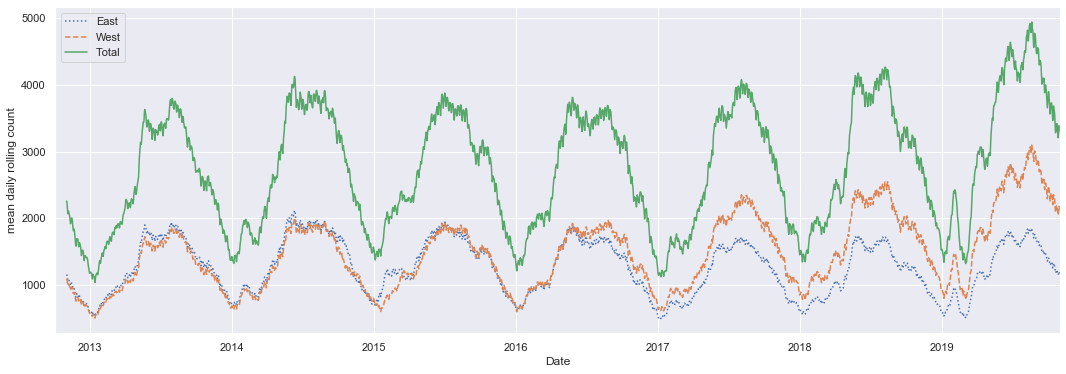

In [17]:
fig, ax = plt.subplots(figsize=(18,6))

daily_rolling.plot(style=[':', '--', '-'], ax=ax);

plt.ylabel('mean daily rolling count');

##  Average traffic as a function of the time of day

In [18]:
data.index

DatetimeIndex(['2019-01-01 00:00:00', '2019-01-01 01:00:00',
               '2019-01-01 02:00:00', '2019-01-01 03:00:00',
               '2019-01-01 04:00:00', '2019-01-01 05:00:00',
               '2019-01-01 06:00:00', '2019-01-01 07:00:00',
               '2019-01-01 08:00:00', '2019-01-01 09:00:00',
               ...
               '2016-12-06 00:00:00', '2016-01-22 20:00:00',
               '2017-04-04 01:00:00', '2013-01-18 04:00:00',
               '2017-01-12 04:00:00', '2016-02-29 00:00:00',
               '2013-09-13 03:00:00', '2016-12-07 00:00:00',
               '2013-03-29 04:00:00', '2017-05-24 01:00:00'],
              dtype='datetime64[ns]', name='Date', length=62031, freq=None)

In [19]:
data.index.time

array([datetime.time(0, 0), datetime.time(1, 0), datetime.time(2, 0), ...,
       datetime.time(0, 0), datetime.time(4, 0), datetime.time(1, 0)],
      dtype=object)

In [20]:
pd.options.display.max_rows = 24

by_time = data.groupby(data.index.time).mean()
by_time

,East,West,Total
00:00:00,5.031335,6.794584,11.825919
01:00:00,2.815474,3.445261,6.260735
02:00:00,1.996512,2.123643,4.120155
03:00:00,1.571373,1.468859,3.040232
04:00:00,3.541586,3.148936,6.690522
05:00:00,16.316828,10.099033,26.415861
06:00:00,56.335010,36.203095,92.538104
07:00:00,147.330368,86.517988,233.848356
08:00:00,198.531141,132.673114,331.204255
09:00:00,106.626161,86.599845,193.226006


In [21]:
pd.options.display.max_rows = 12

In [22]:
hourly_ticks = 2 * 60 * 60 * np.arange(12)
hourly_ticks

array([    0,  7200, 14400, 21600, 28800, 36000, 43200, 50400, 57600,
       64800, 72000, 79200])

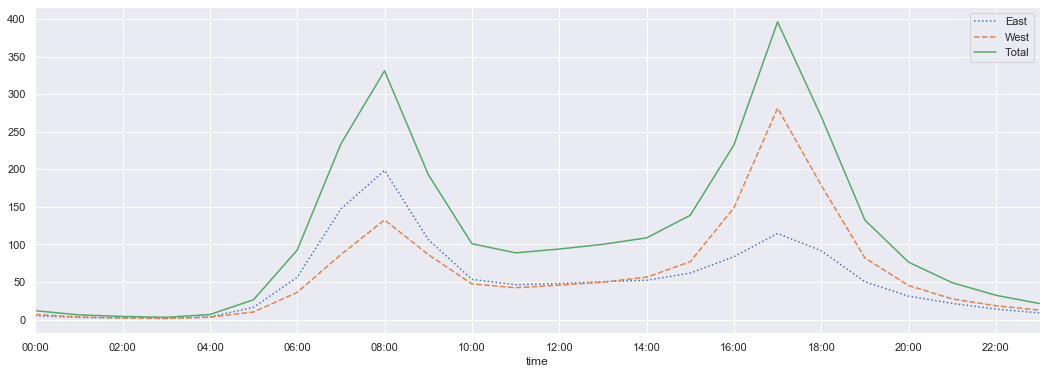

In [23]:
fig, ax = plt.subplots(figsize=(18,6))

by_time.plot(xticks=hourly_ticks, style=[':', '--', '-'], ax=ax);

- peaks at 8 AM and 5 PM  (bi-modal)
- the western sidewalk (generally used going toward downtown Seattle), which peaks more strongly in the morning, and the eastern sidewalk (generally used going away from downtown Seattle), which peaks more strongly in the evening

### Average traffic as a function of the day of the week

In [24]:
data.index.dayofweek

Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            1, 4, 1, 4, 3, 0, 4, 2, 4, 2],
           dtype='int64', name='Date', length=62031)

In [25]:
by_weekday = data.groupby(data.index.dayofweek).mean()
by_weekday

,East,West,Total
Date,,,
0,60.313008,73.824639,134.137647
1,64.810707,78.738197,143.548904
2,64.227477,78.014527,142.242005
3,61.406982,73.729054,135.136036
4,55.248136,66.435396,121.683533
5,32.511631,31.875339,64.386969
6,31.429443,29.853350,61.282793


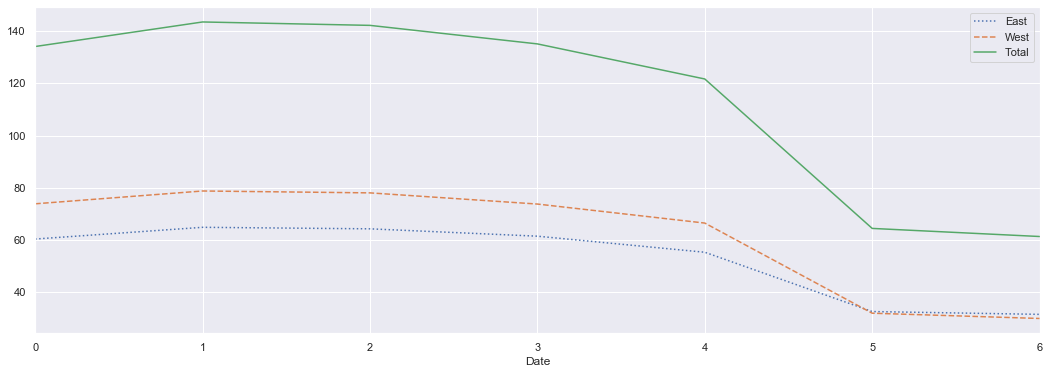

In [26]:
fig, ax = plt.subplots(figsize=(18,6))
by_weekday.plot(style=[':', '--', '-'], ax=ax);

In [27]:
by_weekday.index

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64', name='Date')

In [28]:
by_weekday.index = [calendar.day_name[index] for index in by_weekday.index]
by_weekday

,East,West,Total
Monday,60.313008,73.824639,134.137647
Tuesday,64.810707,78.738197,143.548904
Wednesday,64.227477,78.014527,142.242005
Thursday,61.406982,73.729054,135.136036
Friday,55.248136,66.435396,121.683533
Saturday,32.511631,31.875339,64.386969
Sunday,31.429443,29.853350,61.282793


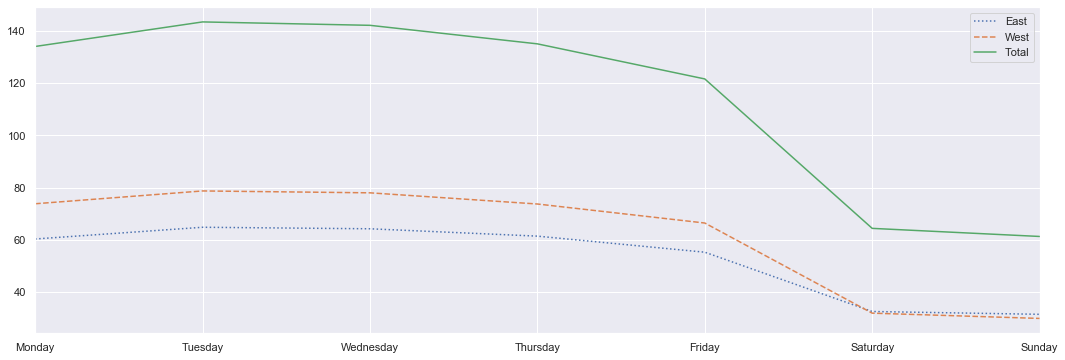

In [29]:
fig, ax = plt.subplots(figsize=(18,6))

by_weekday.plot(style=[':', '--', '-'], ax=ax)

plt.xticks(list(range(len(by_weekday.index))), by_weekday.index)

plt.show()

### Hourly trends on Weekdays versus Weekends

In [30]:
(data.index.weekday == data.index.dayofweek).all()

True

In [31]:
weekend = np.where(data.index.weekday < 5, 'Weekday', 'Weekend')

by_time = data.groupby([weekend, data.index.time]).mean()
by_time

East       West      Total
Weekday 00:00:00   4.264754   5.628587   9.893341
        01:00:00   2.219816   2.678939   4.898755
        02:00:00   1.625338   1.644829   3.270168
        03:00:00   1.467244   1.340552   2.807796
        04:00:00   4.295073   3.460747   7.755820
...                     ...        ...        ...
Weekend 19:00:00  28.177507  28.749322  56.926829
        20:00:00  19.891599  22.010840  41.902439
        21:00:00  13.955285  15.925474  29.880759
        22:00:00  10.210027  12.479675  22.689702
        23:00:00   7.432249  10.563686  17.995935

[48 rows x 3 columns]

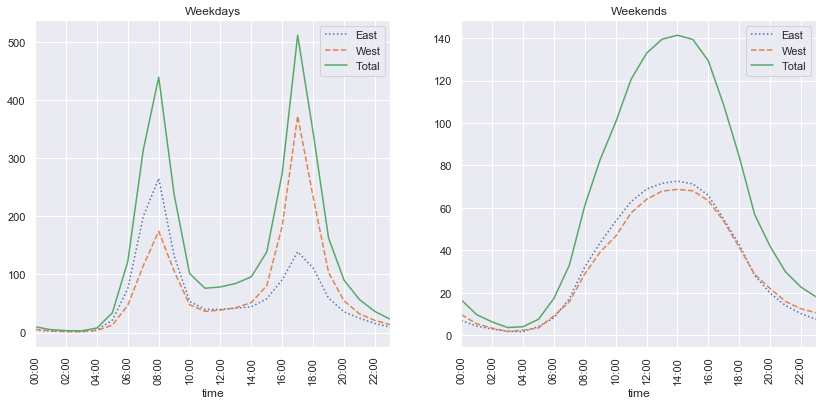

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', rot=90,
                           xticks=hourly_ticks, style=[':', '--', '-'])

by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends', rot=90,
                           xticks=hourly_ticks, style=[':', '--', '-']);

<img src="https://image.businessinsider.com/5d079cfe6fc92046153c4b73?width=1200&format=jpeg&auto=webp" width="600"/>

In [33]:
# Define a function which returns the hours of daylight
# given the day of the year, from 0 to 365

def hours_of_daylight(date, axis=23.45, latitude=47.61):
    """Compute the hours of daylight for the given date"""
    diff = date - pd.datetime(2000, 12, 21)
    day = diff.total_seconds() / 24. / 3600
    day %= 365.25
    m = 1. - np.tan(np.radians(latitude)) * np.tan(np.radians(axis) * np.cos(day * np.pi / 182.625))
    m = max(0, min(m, 2))
    return 24. * np.degrees(np.arccos(1 - m)) / 180.


In [34]:
# Boston
hours_of_daylight(pd.datetime(2019, 11, 11), latitude=42.361145)

9.713211210612382

In [35]:
hours_of_daylight(pd.datetime(2019, 6, 21))

15.782211624938212

In [36]:
hours_of_daylight(pd.datetime(2019, 12, 21))

8.217307224137711

In [37]:
hours_of_daylight(pd.datetime(2019, 12, 21), latitude=0)

12.0

In [38]:
weekly['daylight'] = weekly.index.map(hours_of_daylight)
daily['daylight'] = daily.index.map(hours_of_daylight)

In [39]:
weekly

,East,West,Total,daylight
Date,,,,
2012-10-07,7297.0,6995.0,14292.0,11.044795
2012-10-14,8679.0,8116.0,16795.0,10.644257
2012-10-21,7946.0,7563.0,15509.0,10.254526
2012-10-28,6901.0,6536.0,13437.0,9.880129
2012-11-04,6408.0,5786.0,12194.0,9.526492
...,...,...,...,...
2019-10-06,9785.0,17485.0,27270.0,11.146162
2019-10-13,8543.0,14952.0,23495.0,10.743537
2019-10-20,6835.0,12497.0,19332.0,10.350712


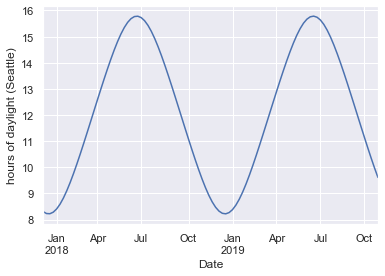

In [40]:
# Plot the daylight curve
weekly['daylight'].iloc[-100:].plot()
plt.ylabel('hours of daylight (Seattle)');

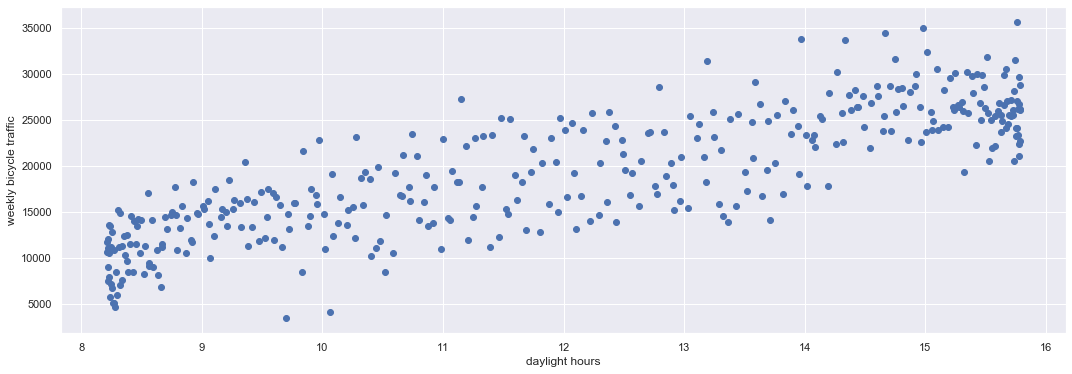

In [41]:
fig, ax = plt.subplots(figsize=(18,6))

plt.scatter(weekly['daylight'], weekly['Total'])
plt.xlabel('daylight hours')
plt.ylabel('weekly bicycle traffic');

### Linear Regression

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
weekly

,East,West,Total,daylight
Date,,,,
2012-10-07,7297.0,6995.0,14292.0,11.044795
2012-10-14,8679.0,8116.0,16795.0,10.644257
2012-10-21,7946.0,7563.0,15509.0,10.254526
2012-10-28,6901.0,6536.0,13437.0,9.880129
2012-11-04,6408.0,5786.0,12194.0,9.526492
...,...,...,...,...
2019-10-06,9785.0,17485.0,27270.0,11.146162
2019-10-13,8543.0,14952.0,23495.0,10.743537
2019-10-20,6835.0,12497.0,19332.0,10.350712


In [44]:
X = weekly[['daylight']]
y = weekly['Total']

In [45]:
clf = LinearRegression().fit(X, y)

In [46]:
weekly['daylight_trend'] = clf.predict(X)
weekly['daylight_trend'].mean()

19221.710810810815

In [47]:
weekly['daylight_corrected_total'] = \
    weekly['Total'] - weekly['daylight_trend'] + weekly['daylight_trend'].mean()

In [48]:
weekly.head()

,East,West,Total,daylight,daylight_trend,daylight_corrected_total
Date,,,,,,
2012-10-07,7297.0,6995.0,14292.0,11.044795,17209.473177,16304.237634
2012-10-14,8679.0,8116.0,16795.0,10.644257,16346.157630,19670.553181
2012-10-21,7946.0,7563.0,15509.0,10.254526,15506.134897,19224.575914
2012-10-28,6901.0,6536.0,13437.0,9.880129,14699.164501,17959.546309
2012-11-04,6408.0,5786.0,12194.0,9.526492,13936.937281,17478.773530


In [49]:
xfit = np.linspace(7, 17)
yfit = clf.predict(xfit[:, np.newaxis])

In [50]:
yfit

array([ 8491.36348599,  8931.23892372,  9371.11436146,  9810.98979919,
       10250.86523692, 10690.74067465, 11130.61611239, 11570.49155012,
       12010.36698785, 12450.24242559, 12890.11786332, 13329.99330105,
       13769.86873878, 14209.74417652, 14649.61961425, 15089.49505198,
       15529.37048972, 15969.24592745, 16409.12136518, 16848.99680292,
       17288.87224065, 17728.74767838, 18168.62311611, 18608.49855385,
       19048.37399158, 19488.24942931, 19928.12486705, 20368.00030478,
       20807.87574251, 21247.75118024, 21687.62661798, 22127.50205571,
       22567.37749344, 23007.25293118, 23447.12836891, 23887.00380664,
       24326.87924438, 24766.75468211, 25206.63011984, 25646.50555757,
       26086.38099531, 26526.25643304, 26966.13187077, 27406.00730851,
       27845.88274624, 28285.75818397, 28725.6336217 , 29165.50905944,
       29605.38449717, 30045.2599349 ])

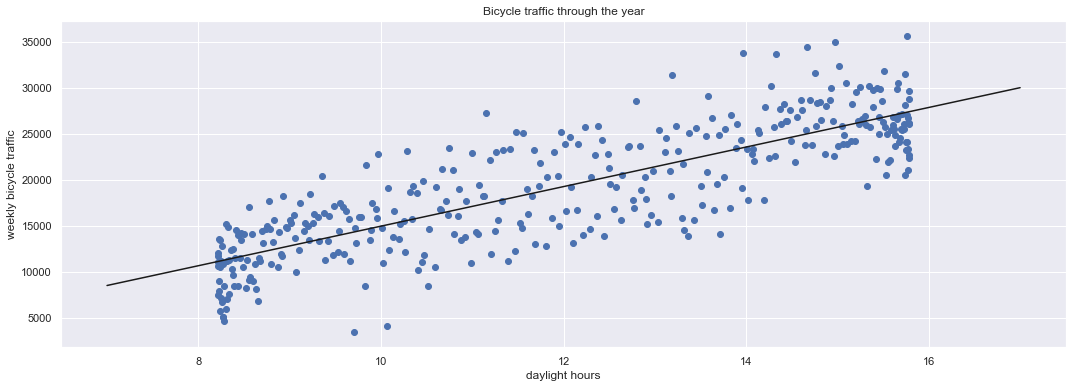

In [51]:
fig, ax = plt.subplots(figsize=(18,6))

plt.scatter(weekly['daylight'], weekly['Total'])
plt.plot(xfit, yfit, '-k')

plt.title("Bicycle traffic through the year")
plt.xlabel('daylight hours')
plt.ylabel('weekly bicycle traffic');

In [52]:
print(clf.coef_[0])

2155.3896448914234


 - each extra hour of daylight leads to about 2000 more riders per week across the bridge

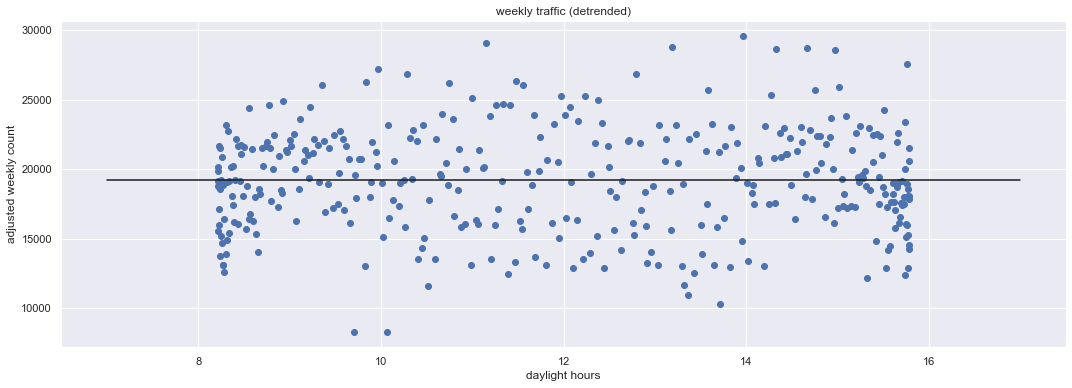

In [53]:
# Now that we have fit this trend, let's subtract it and replace it by the mean
fig, ax = plt.subplots(figsize=(18,6))

trend = clf.predict(weekly[['daylight']].values)

plt.scatter(weekly['daylight'], weekly['Total'] - trend + np.mean(trend))
plt.plot(xfit, np.mean(trend) + 0 * yfit, '-k')

plt.title("weekly traffic (detrended)")
plt.xlabel('daylight hours')
plt.ylabel('adjusted weekly count');

- de-trended data
- removed the component of the data which correlates with the number of hours in a day
- the number of cyclists we'd expect to see if the hours of daylight were not a factor

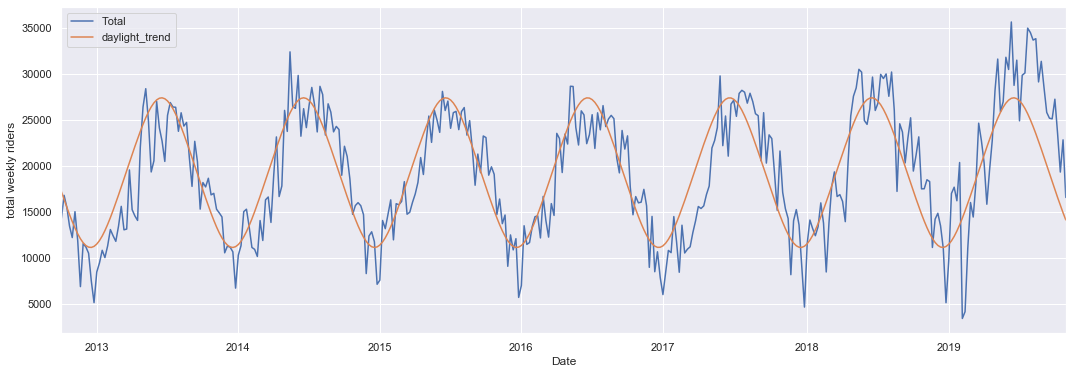

In [54]:
fig, ax = plt.subplots(figsize=(18,6))

weekly[['Total', 'daylight_trend']].plot(ax=ax)

plt.ylabel("total weekly riders");

root-mean-square about trend: 3754 riders


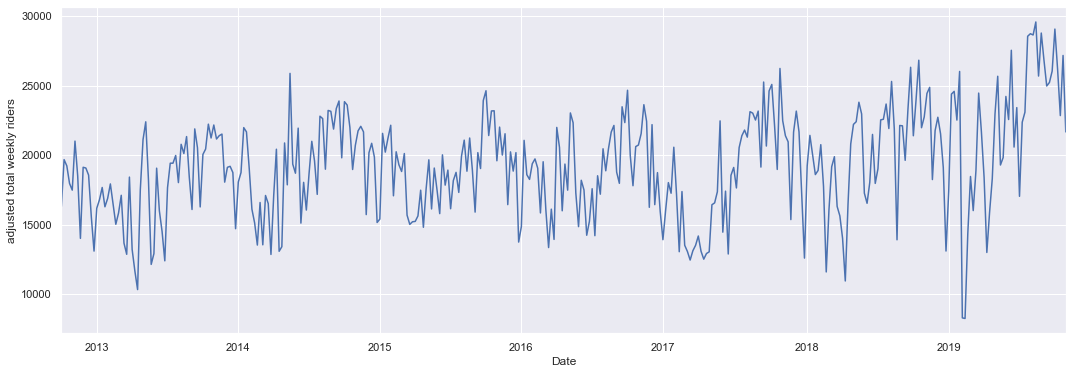

In [55]:
fig, ax = plt.subplots(figsize=(18,6))

weekly['daylight_corrected_total'].plot(ax=ax)

rms = np.std(weekly['daylight_corrected_total'])

plt.ylabel("adjusted total weekly riders")

print("root-mean-square about trend: {0:.0f} riders".format(rms))

- With the data de-trended, we get a better idea of how bicycling in Seattle has changed over time, corrected for the seasonal variation.

### Statsmodels

In [56]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [57]:
decompfreq = 12  # 12 months seasonality
model = 'additive'

decomposition = seasonal_decompose(weekly['Total'].interpolate("linear"), 
                                   freq=decompfreq, model=model)

In [58]:
trend = decomposition.trend
seasonal = decomposition.seasonal 
residual = decomposition.resid

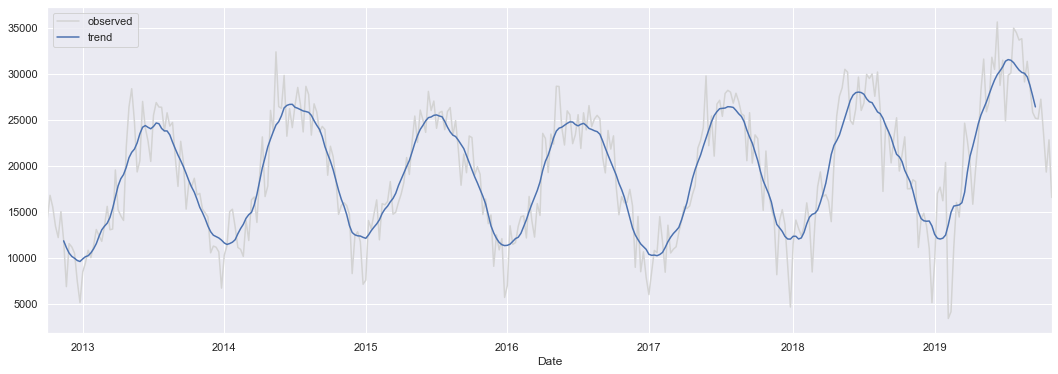

In [59]:
fig, ax = plt.subplots(figsize=(18,6))
weekly['Total'].plot(ax=ax, label="observed", c='lightgrey')
trend.plot(ax=ax, label="trend")
plt.legend(loc='upper left');

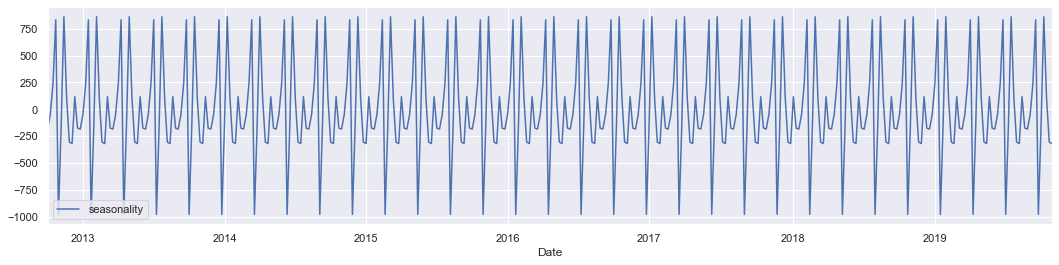

In [60]:
fig, ax = plt.subplots(figsize=(18,4))
seasonal.plot(ax=ax, label="seasonality")
plt.legend(loc='lower left');

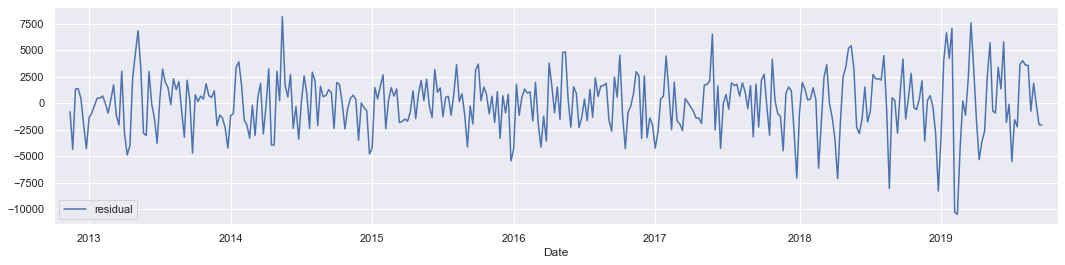

In [61]:
fig, ax = plt.subplots(figsize=(18,4))
residual.plot(ax=ax, label="residual")
plt.legend(loc='lower left');